**Autor**: &nbsp; Pedro Martín Calzada &nbsp; (pedro.martinc@estudiante.uam.es)

# Datos Kerlmarsh Nº6 (2020-2021)

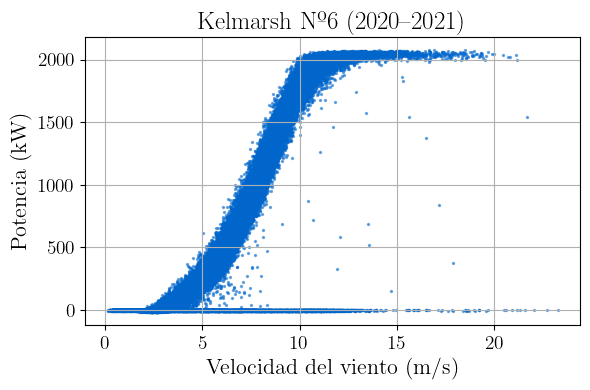

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

# Datos.
df_2020 = pd.read_csv("data_2020.csv")
df_2021 = pd.read_csv("data_2021.csv")

df = pd.concat([df_2020, df_2021], ignore_index=True)

V = df['Wind speed (m/s)']
P = df['Power (kW)']

# Figura.
plt.figure(figsize=(6, 4))
plt.scatter(V, P, color='#0066cc', s=2, alpha=0.5)
plt.title(r"Kelmarsh Nº6 (2020--2021)", fontsize=18)
plt.xlabel(r"Velocidad del viento (m/s)", fontsize=16)
plt.ylabel(r"Potencia (kW)", fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

In [2]:
# Contar filas con valores faltantes (missing values) en velocidad del viento o potencia.
missing_rows = df[['Wind speed (m/s)', 'Power (kW)']].isnull().any(axis=1).sum()
print(f"Número de filas con valores faltantes: {missing_rows}")

Número de filas con valores faltantes: 997


In [3]:
# Máscara para limpieza o filtrado de datos.
mask = (
    (P > 0) | (V < 3)
) & (V <= 21) & ~(
    ((V > 15) & (P < 1900)) |
    ((V > 12) & (P < 1750)) |
    ((V > 11) & (P < 1700)) |
    ((V > 10) & (P < 1500)) |
    ((V > 7.5) & (P < 700)) |
    ((V > 7) & (P < 400)) |
    ((V > 6) & (P < 250)) |
    ((V > 5.5) & (P < 150)) |
    ((V > 5) & (P < 100))
)

# Porcentaje de puntos eliminados.
total_points = len(df)
remaining_points = mask.sum()
removed_points = total_points - remaining_points
percentage_removed = 100 * removed_points / total_points

print(f"Total de puntos: {total_points}")
print(f"Puntos restantes tras aplicar la máscara: {remaining_points}")
print(f"Puntos eliminados: {removed_points}")
print(f"Porcentaje de puntos eliminados: {percentage_removed:.2f}%")

Total de puntos: 105264
Puntos restantes tras aplicar la máscara: 99319
Puntos eliminados: 5945
Porcentaje de puntos eliminados: 5.65%


### Comparativa antes y después de limpiar

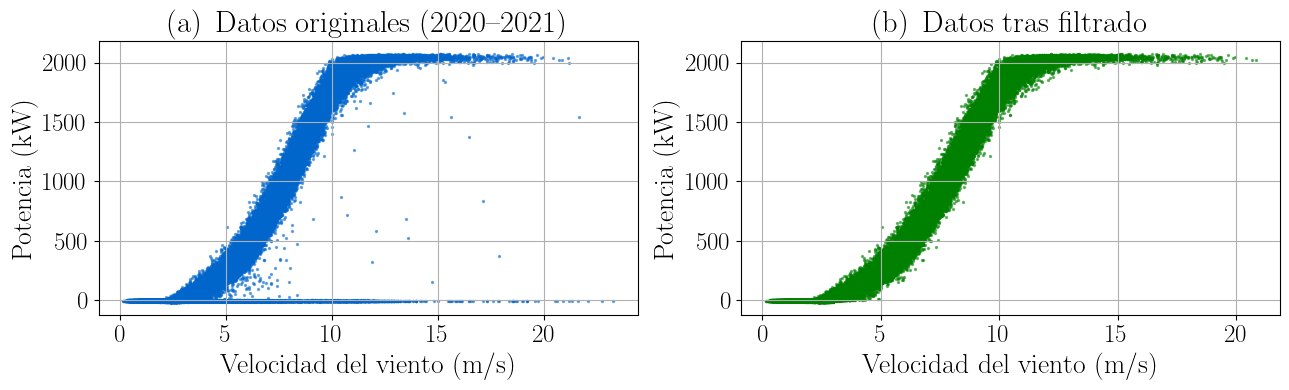

In [4]:
# Datos.
df_2020 = pd.read_csv("data_2020.csv")
df_2021 = pd.read_csv("data_2021.csv")
df = pd.concat([df_2020, df_2021], ignore_index=True)

V = df['Wind speed (m/s)']
P = df['Power (kW)']

# Máscara de limpieza.
mask = (
    ((P > 0) | (V < 3)) & (V <= 21) & ~(
        ((V > 15) & (P < 1900)) |
        ((V > 12) & (P < 1750)) |
        ((V > 11) & (P < 1700)) |
        ((V > 10) & (P < 1500)) |
        ((V > 7.5) & (P < 700)) |
        ((V > 7) & (P < 400)) |
        ((V > 6) & (P < 250)) |
        ((V > 5.5) & (P < 150)) |
        ((V > 5) & (P < 100))
    )
)

# Crear la figura con dos subgráficas lado a lado.
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# Gráfica original.
axes[0].scatter(V, P, color='#0066cc', s=2, alpha=0.5)
axes[0].set_title(r"(a)\, Datos originales (2020--2021)", fontsize=22)
axes[0].set_xlabel(r"Velocidad del viento (m/s)", fontsize=20)
axes[0].set_ylabel(r"Potencia (kW)", fontsize=20)
axes[0].grid(True)
axes[0].tick_params(axis='both', labelsize=18)

# Gráfica filtrada.
axes[1].scatter(V[mask], P[mask], color='green', s=2, alpha=0.5)
axes[1].set_title(r"(b)\, Datos tras filtrado", fontsize=22)
axes[1].set_xlabel(r"Velocidad del viento (m/s)", fontsize=20)
axes[1].set_ylabel(r"Potencia (kW)", fontsize=20)
axes[1].grid(True)
axes[1].tick_params(axis='both', labelsize=18)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()